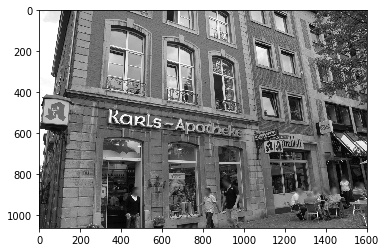

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
DATADIR = "C:/Users/Zilehuma/Desktop/FYP/datasetdn"
CATEGORIES = ["day","night"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


In [3]:
print(img_array.shape)

(1063, 1600)


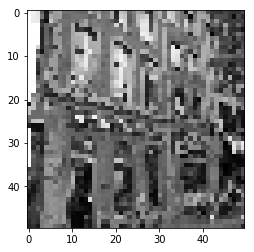

In [4]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()


In [5]:
training_data=[]

def create_training_dataset():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_dataset()


In [6]:
print(len(training_data))

1197


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
0
0
1
1
0


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
X[1]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [2],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [2],
        [1],
        [1]]], dtype=uint8)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
#from keras.layers.convolutional import MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X= X/255.0
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])


history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)


Instructions for updating:
Colocations handled automatically by placer.
Train on 1077 samples, validate on 120 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1077/1077 [==============================] - 8s 7ms/sample - loss: 0.3450 - acc: 0.8422 - val_loss: 0.1715 - val_acc: 0.9583
Epoch 2/10
1077/1077 [==============================] - 4s 4ms/sample - loss: 0.1037 - acc: 0.9601 - val_loss: 0.0926 - val_acc: 0.9583
Epoch 3/10
1077/1077 [==============================] - 4s 4ms/sample - loss: 0.0673 - acc: 0.9786 - val_loss: 0.0832 - val_acc: 0.9583
Epoch 4/10
1077/1077 [==============================] - 4s 4ms/sample - loss: 0.0481 - acc: 0.9851 - val_loss: 0.0726 - val_acc: 0.9750
Epoch 5/10
1077/1077 [==============================] - 4s 4ms/sample - loss: 0.0424 - acc: 0.9851 - val_loss: 0.0477 - val_acc: 0.9750
Epoch 6/10
1077/1077 [==============================] - 4s 4ms/sample - loss: 0.0425 - acc: 0.9879 - val_loss: 0.0802 - val_acc: 0.9667
Epoch 7/10
1077/1

In [24]:
model.save('Day_night_classifier.model')

In [16]:
new_model = tf.keras.models.load_model('Day_night_classifier.model')

In [3]:
import tensorflow as tf
import cv2

CATEGORIES = ["day", "night"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#img = cv2.imread('C:\test\IMG_5013.jpg')
#img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img, (50, 50))
#img.reshape(-1, 50, 50, 1)

 

model = tf.keras.models.load_model("Day_night_classifier.model")
prediction = model.predict([prepare('C:/test/night/11.JPEG')])
print(prediction)

[[1.]]


In [4]:
prediction = model.predict([prepare('C:/test/night/11.jpeg')])

print(CATEGORIES[int(prediction[0][0])])

night


In [2]:
import tensorflow as tf
import cv2

CATEGORIES = ["day", "night"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#img = cv2.imread('C:\test\IMG_5013.jpg')
#img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img, (50, 50))
#img.reshape(-1, 50, 50, 1)

 

model = tf.keras.models.load_model("Day_night_classifier.model")
prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Day/1 (28).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Day/1 (29).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Day/1 (30).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Day/1 (31).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Day/1 (32).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Day/1 (33).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Day/1 (34).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Night/1 (1).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Night/1 (2).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Night/1 (3).JPG')])
print(prediction)
print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Night/1 (4).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Night/1 (5).JPG')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])
prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Night/1 (6).JPG')])
print(prediction)

print(CATEGORIES[int(prediction[0][0])])

prediction = model.predict([prepare('C:/Users/Zilehuma/Desktop/test/Night/1 (7).JPG')])
print(prediction)


print(CATEGORIES[int(prediction[0][0])])


[[0.]]
day
[[0.]]
day
[[0.]]
day
[[0.]]
day
[[0.]]
day
[[0.]]
day
[[0.]]
day
[[1.]]
night
[[0.]]
day
[[0.]]
day
[[1.]]
night
[[0.]]
day
[[0.]]
day
[[1.]]
night


Confusion Matrix :
[[24  0]
 [ 4 35]]
Accuracy Score : 0.9365079365079365
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.90      0.95        39

   micro avg       0.94      0.94      0.94        63
   macro avg       0.93      0.95      0.93        63
weighted avg       0.95      0.94      0.94        63



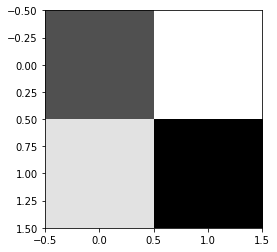

In [4]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

  
actual =    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0] 
predicted = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0] 
results = confusion_matrix(actual, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print( classification_report(actual, predicted) )
plt.show()

plt.imshow(results,cmap="binary")

def perf_measure(actual, predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predicted)): 
        if actual[i]==predicted[i]==1:
           TP += 1
        if predicted[i] ==1 and actual[i]!=predicted[i]:
           FP += 1
        if actual[i]==predicted[i]==0:
           TN += 1
        if predicted[i]==0 and actual[i]!=predicted[i]:
           FN += 1

    return(TP, FP, TN, FN)


perf_measure(actual, predicted)


plt.imshow(results,cmap="binary")